In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

## Retrieve data

In [2]:
# Read data
moisture_data = pd.read_excel('moisture_data_joel.xlsx')
adherence_data = pd.read_excel('adherence_data.xlsx')

# Create identifier for runs
moisture_data['RunID'] = (moisture_data['Id_Material'] != moisture_data['Id_Material'].shift(1)).cumsum()

# Filter data after TT
data_after_TT = moisture_data.copy()
data_after_TT = moisture_data[moisture_data['Fecha.1'] >= "2024/09/16"]

# Create a common identifier for joining datasets
data_after_TT['Timestamp'] = data_after_TT['Fecha.1']
adherence_data['Timestamp'] = adherence_data['KibbleIDChange']

# Join Datasets
combined_df = pd.concat([data_after_TT, adherence_data], ignore_index=True)
combined_df = combined_df.sort_values(by="Timestamp").reset_index(drop=True)

# Fill NaN for adherence scores
combined_df['AdhZ1'] = combined_df['AdhZ1'].fillna(method='ffill')
combined_df['AdhZ2'] = combined_df['AdhZ2'].fillna(method='ffill')

# Filtering for the list of 12 kibbles
kibble_list = [2333, 2332, 2331, 2339, 2335, 2338, 2336, 5584, 5583, 2199, 894]
combined_df = combined_df[combined_df['Id_Material'].isin(kibble_list)]

C:\Users\YX436MP\AppData\Local\Temp\ipykernel_7728\1036187513.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_TT['Timestamp'] = data_after_TT['Fecha.1']
C:\Users\YX436MP\AppData\Local\Temp\ipykernel_7728\1036187513.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['AdhZ1'] = combined_df['AdhZ1'].fillna(method='ffill')
C:\Users\YX436MP\AppData\Local\Temp\ipykernel_7728\1036187513.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['AdhZ2'] = combined_df['AdhZ2'].fillna(method='ffill')


## After Analysis - All Lines - with adherence

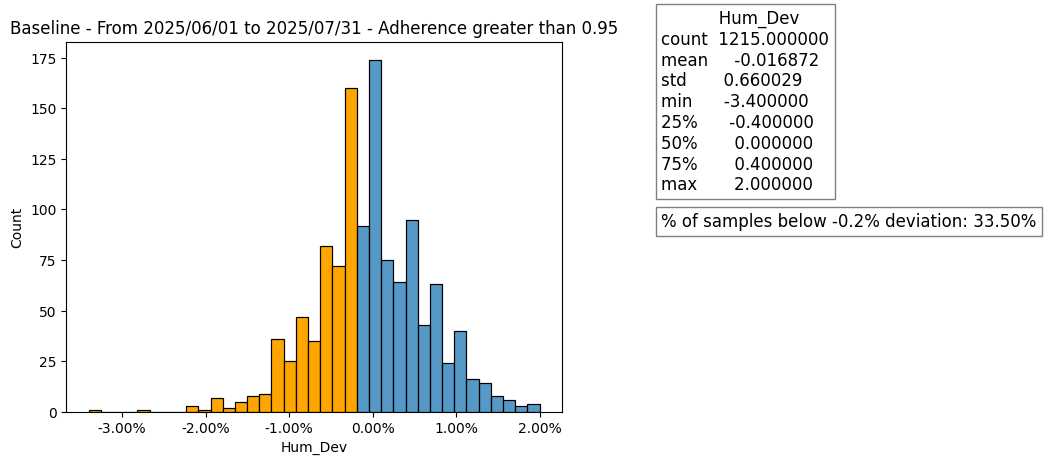

In [3]:
# set line
# line = 2

# date filters
date_filter_1 = "2025/06/01"
date_filter_2 = "2025/07/31"

# Adherence threshold
adherence = 0.95

# Set the title for the plot
title = f'Baseline - From {date_filter_1} to {date_filter_2} - Adherence greater than {adherence}'


# Filter the combined DataFrame to select data within the specified date range
filtered_data = combined_df[(combined_df['Timestamp'] >= date_filter_1) & 
                            (combined_df['Timestamp'] <= date_filter_2) &
                            (combined_df['AdhZ1'] >= adherence) &
                            (combined_df['AdhZ2'] >= adherence)]

# Filter for the line
# filtered_data = filtered_data[filtered_data['Linea'] == line]

# Count the number of samples where 'Hum_Dev' is less than -0.2
target_samples = len(filtered_data['Hum_Dev'][filtered_data['Hum_Dev'] < -0.2])

# Count the total number of non-NaN samples in 'Hum_Dev'
total_samples = filtered_data['Hum_Dev'].count()

# Calculate the percentage of samples below -0.2 deviation
ratio_below = target_samples / total_samples * 100

# Get descriptive statistics for the 'Hum_Dev' column
stats = filtered_data[['Hum_Dev']].describe()

# Create a histogram of the 'Hum_Dev' data
ax = sns.histplot(data=filtered_data['Hum_Dev'], stat='count')

# Highlight bins in the histogram where the center is less than -0.2
for patch in ax.patches:
    bin_center = patch.get_x() + patch.get_width() / 2
    if bin_center < -0.2:
        patch.set_facecolor('orange')  # Set the color to orange for these bins

# Get the current limits of the x and y axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Calculate the x position for the text boxes, 10% to the right of the x-axis limit
text_x = xlim[1] + 0.2 * (xlim[1] - xlim[0])

# Calculate y positions for the text boxes, at 50% and 60% of the y-axis limit
text_y1 = ylim[1] * 0.5
text_y2 = ylim[1] * 0.6

# Add a text box with the percentage of samples below -0.2% deviation
plt.text(x=text_x, y=text_y1, s=f'% of samples below -0.2% deviation: {ratio_below:.2f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a text box with descriptive statistics
plt.text(x=text_x, y=text_y2, s=stats.to_string(), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set the title of the plot
plt.title(title)

# Format the x-axis labels to show two decimal places
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Define a function to format the x-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x:.2f}%'

# Apply the percentage formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Display the plot
plt.show()

## After analysis without adherence

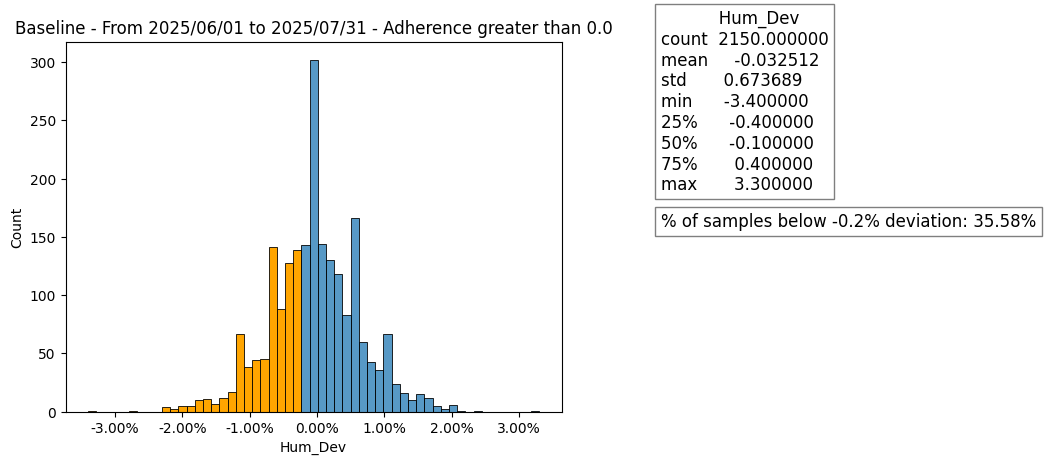

In [4]:
# set line
# line = 2

# date filters
date_filter_1 = "2025/06/01"
date_filter_2 = "2025/07/31"

# Adherence threshold
adherence = 0.0

# Set the title for the plot
title = f'Baseline - From {date_filter_1} to {date_filter_2} - Adherence greater than {adherence}'


# Filter the combined DataFrame to select data within the specified date range
filtered_data = combined_df[(combined_df['Timestamp'] >= date_filter_1) & 
                            (combined_df['Timestamp'] <= date_filter_2) &
                            (combined_df['AdhZ1'] >= adherence) &
                            (combined_df['AdhZ2'] >= adherence)]

# Filter for the line
# filtered_data = filtered_data[filtered_data['Linea'] == line]

# Count the number of samples where 'Hum_Dev' is less than -0.2
target_samples = len(filtered_data['Hum_Dev'][filtered_data['Hum_Dev'] < -0.2])

# Count the total number of non-NaN samples in 'Hum_Dev'
total_samples = filtered_data['Hum_Dev'].count()

# Calculate the percentage of samples below -0.2 deviation
ratio_below = target_samples / total_samples * 100

# Get descriptive statistics for the 'Hum_Dev' column
stats = filtered_data[['Hum_Dev']].describe()

# Create a histogram of the 'Hum_Dev' data
ax = sns.histplot(data=filtered_data['Hum_Dev'], stat='count')

# Highlight bins in the histogram where the center is less than -0.2
for patch in ax.patches:
    bin_center = patch.get_x() + patch.get_width() / 2
    if bin_center < -0.2:
        patch.set_facecolor('orange')  # Set the color to orange for these bins

# Get the current limits of the x and y axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Calculate the x position for the text boxes, 10% to the right of the x-axis limit
text_x = xlim[1] + 0.2 * (xlim[1] - xlim[0])

# Calculate y positions for the text boxes, at 50% and 60% of the y-axis limit
text_y1 = ylim[1] * 0.5
text_y2 = ylim[1] * 0.6

# Add a text box with the percentage of samples below -0.2% deviation
plt.text(x=text_x, y=text_y1, s=f'% of samples below -0.2% deviation: {ratio_below:.2f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a text box with descriptive statistics
plt.text(x=text_x, y=text_y2, s=stats.to_string(), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set the title of the plot
plt.title(title)

# Format the x-axis labels to show two decimal places
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Define a function to format the x-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x:.2f}%'

# Apply the percentage formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Display the plot
plt.show()


## Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

combined_df['MoisDevStatus'] = np.where(combined_df['Hum_Dev'] < -0.2, 0, 1)
combined_df = combined_df.drop(labels='Hum_Dev', axis=1)

# Remove some features
features_to_remove = ['QueryRunDate',
                      'LowAdhFlag',
                      'DurationMinutes',
                      'KibbleIDChange',
                      'UserID',
                      'MatID',
                      'Shift',
                      'Date',
                      'ProcessLineID',
                      'AdhScoreID',
                      'RunID',
                      'Fecha.1',
                      'Id_Lectura',
                      'Fecha',
                      'Id_Evaluacion',
                      'Descripcion',
                      'Codigo_SAP',
                      'Timestamp',
                    #   'Humedad_TBalanza'
                      ]
combined_df = combined_df.drop(labels = features_to_remove, axis=1)

# Preprocessing
encoder = OneHotEncoder()

# OHE on shift
encoded_array = encoder.fit_transform(combined_df[['Turno']])

# transform to df
encoded_df = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(['Turno']))

# concatenae to original df
concat_df = pd.concat([combined_df, encoded_df], axis=1)

# remove original column
concat_df = concat_df.drop(labels='Turno',axis=1)

# drop NaN
concat_df = concat_df.dropna(axis=0)

# Split features from target
y = concat_df['MoisDevStatus'].values
X = concat_df.copy()
X = concat_df.drop(labels='MoisDevStatus', axis=1)
# X = X_copy[['AdhZ1', 'AdhZ2']]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
# checking the size of dfs
print('X size before split: ', X.shape)
print('y size before split: ', y.shape)
print("X_train size: ",X_train.shape)
print("y_train size: ",y_train.shape)
print("X_val size: ",X_val.shape)
print("y_val size: ",y_val.shape)


X size before split:  (6797, 10)
y size before split:  (6797,)
X_train size:  (5437, 10)
y_train size:  (5437,)
X_val size:  (1360, 10)
y_val size:  (1360,)


## Model 1: all features

Accuracy:  0.94
Confusion matrix: 
 [[ 218   79]
 [   0 1063]]

Metrics report:
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85       297
         1.0       0.93      1.00      0.96      1063

    accuracy                           0.94      1360
   macro avg       0.97      0.87      0.91      1360
weighted avg       0.95      0.94      0.94      1360



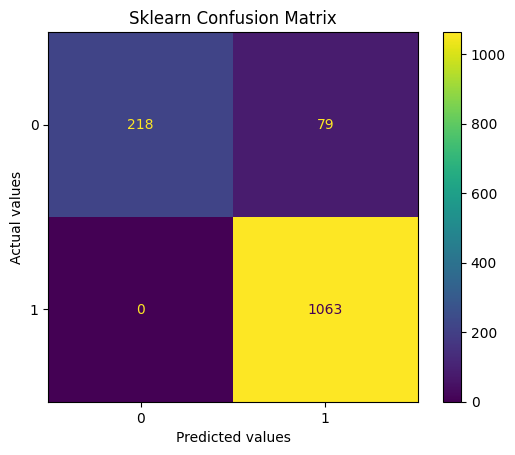

            feature      coef
5  Humedad_TBalanza  3.765070
3     Obj_Hum_Recub -2.386041
4     LSE_Hum_Recub -1.212717
0       Id_Material  0.000000
1             Linea  0.000000
2     LIE_Hum_Recub  0.000000
6             AdhZ1  0.000000
7             AdhZ2  0.000000
8           Turno_D  0.000000
9           Turno_N  0.000000
Normalized confusion matrix: 
 [[0.73400673 0.26599327]
 [0.         1.        ]]


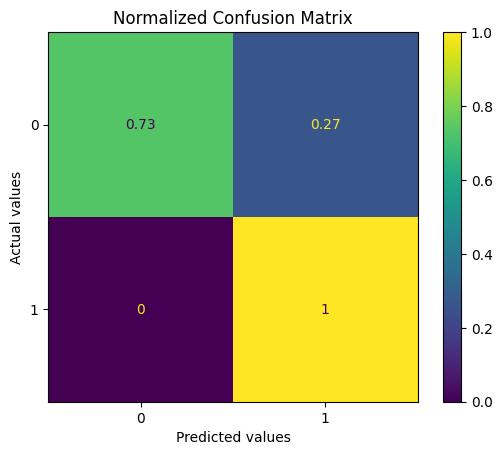

In [6]:
# initialize logistic regression class
lr_model = LogisticRegression(penalty='l1', 
                              C = 0.01, 
                              fit_intercept=True, 
                              random_state=42,
                              solver='liblinear',
                              max_iter = 10000
                              )

# create pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', lr_model)
])

# train model
lr_pipeline.fit(X_train, y_train)

# predict values
y_pred = lr_pipeline.predict(X_val)


# Evaluate accuracy
acc = accuracy_score(y_val, y_pred)
print(f'Accuracy: {acc: .2f}')

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix: \n", cm)

# Other metrics
print('\nMetrics report:')
print(classification_report(y_val,y_pred))


## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm)
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix', 
                xlabel='Predicted values', 
                ylabel='Actual values')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

# Get coefficients to check feature importance
coefs = lr_pipeline.named_steps['logreg'].coef_[0]


features_importance = pd.DataFrame({
    'feature': X.columns,
    'coef': coefs,
    'coef_abs': np.abs(coefs) 
}).sort_values(by='coef_abs', ascending=False)

print(features_importance[['feature','coef']])



# Confusion Matrix (normalized)
cm = confusion_matrix(y_val, y_pred, normalize='true')
print("Normalized confusion matrix: \n", cm)

# Display normalized confusion matrix
cmd_obj = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd_obj.plot()
cmd_obj.ax_.set(
    title='Normalized Confusion Matrix',
    xlabel='Predicted values',
    ylabel='Actual values'
)
plt.show()


## Model 2: only adherence

### preprocess

In [7]:
X_copy = concat_df.copy()
# X = concat_df.drop(labels='MoisDevStatus', axis=1)
X = X_copy[['AdhZ1', 'AdhZ2']]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.5, random_state=42)
# checking the size of dfs
print('X size before split: ', X.shape)
print('y size before split: ', y.shape)
print("X_train size: ",X_train.shape)
print("y_train size: ",y_train.shape)
print("X_val size: ",X_val.shape)
print("y_val size: ",y_val.shape)


X size before split:  (6797, 2)
y size before split:  (6797,)
X_train size:  (3398, 2)
y_train size:  (3398,)
X_val size:  (3399, 2)
y_val size:  (3399,)


Accuracy:  0.61
Confusion matrix: 
 [[ 343  436]
 [ 893 1727]]

Metrics report:
              precision    recall  f1-score   support

         0.0       0.28      0.44      0.34       779
         1.0       0.80      0.66      0.72      2620

    accuracy                           0.61      3399
   macro avg       0.54      0.55      0.53      3399
weighted avg       0.68      0.61      0.63      3399



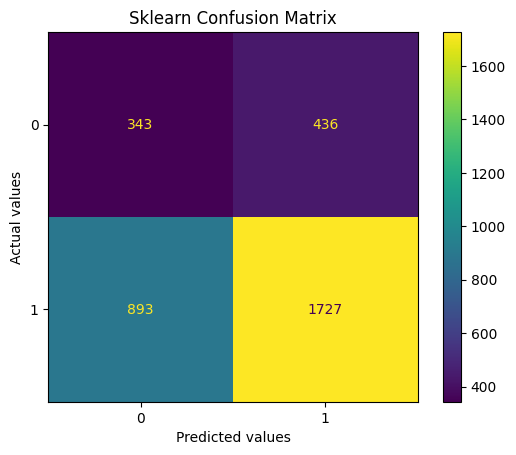

  feature      coef
0   AdhZ1  0.013372
1   AdhZ2  0.013351
Normalized confusion matrix: 
 [[0.44030809 0.55969191]
 [0.34083969 0.65916031]]


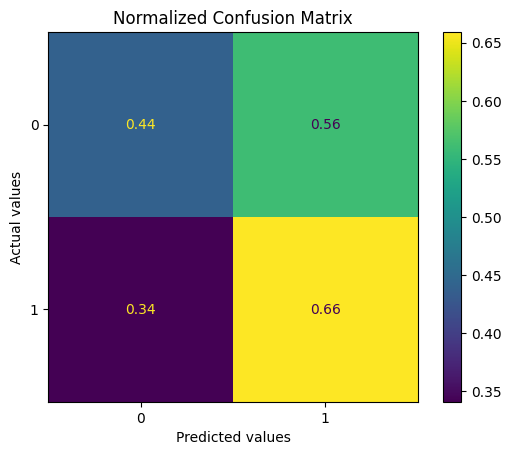

In [8]:
# initialize logistic regression class
lr_model = LogisticRegression(penalty='l2', 
                              C = 0.0001, 
                              fit_intercept=False, 
                              random_state=42,
                              solver='liblinear',
                              max_iter = 10000
                              )

# create pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', lr_model)
])

# train model
lr_pipeline.fit(X_train, y_train)

# predict values
y_pred = lr_pipeline.predict(X_val)


# Evaluate accuracy
acc = accuracy_score(y_val, y_pred)
print(f'Accuracy: {acc: .2f}')

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix: \n", cm)

# Other metrics
print('\nMetrics report:')
print(classification_report(y_val,y_pred))


## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm)
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix', 
                xlabel='Predicted values', 
                ylabel='Actual values')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

# Get coefficients to check feature importance
coefs = lr_pipeline.named_steps['logreg'].coef_[0]


features_importance = pd.DataFrame({
    'feature': X.columns,
    'coef': coefs,
    'coef_abs': np.abs(coefs) 
}).sort_values(by='coef_abs', ascending=False)

print(features_importance[['feature','coef']])


# Confusion Matrix (normalized)
cm = confusion_matrix(y_val, y_pred, normalize='true')
print("Normalized confusion matrix: \n", cm)

# Display normalized confusion matrix
cmd_obj = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd_obj.plot()
cmd_obj.ax_.set(
    title='Normalized Confusion Matrix',
    xlabel='Predicted values',
    ylabel='Actual values'
)
plt.show()
